#### Setup
1. go to https://github.com/CSSEGISandData/COVID-19
2. git clone John Hopkins data repository into your Documents folder (only works for Windows, make necessary adjustments if you're on Mac)

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry_convert as pc
import os
import getpass
import subprocess
from datetime import datetime
user = getpass.getuser()
os.chdir("C:/Users/"+user+"/Documents/git/COVID-19")

top_no_countries = 10

In [2]:
# data pulling and date setting
output = subprocess.check_output(["git", "pull"])
cases_data  = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
last_day = cases_data.columns[-1]
week_ago = cases_data.columns[-8]
days_available = cases_data.columns[4:].tolist()
print(last_day)

4/13/20


In [3]:
# adding continent information to the data
missing_countries = {
    "Congo (Brazzaville)": "AF",
    "Congo (Kinshasa)": "AF",
    "Cote d'Ivoire": "AF",
    "Diamond Princess": "AS",
    "Holy See": "AS",
    "Korea, South": "AS",
    "Taiwan*": "AS",
    "Timor-Leste": "AS",
    "West Bank and Gaza": "AS",
    "Kosovo": "EU",
    "Burma": "AS",
    "MS Zaandam": "NA",
    "US": "NA",
    "Western Sahara": "AF"}

eu_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                'Czechia', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 'Slovakia',
                'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland']

continent_names = {
    'EU': 'Europe',
    'NA': 'North America',
    'AS': 'Asia',
    'SA': 'South America',
    'AF': 'Africa',
    'OC': 'Australia and Oceania'
}

def country_to_continent(country):
    if country in missing_countries:
        return continent_names[missing_countries[country]]
    elif country in eu_countries:
        return 'EU27'
    else:
        try:
            return continent_names[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))]
        except:
            print(country)
            return "XX"

cases_data['continent']  = cases_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)
deaths_data['continent'] = deaths_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)

In [4]:
# continents - cases
continent_cases = cases_data[['continent', week_ago, last_day]]
continent_cases = continent_cases.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_cases['perc_increase'] = continent_cases.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_increase']], index = continent_cases.index)
continent_cases['perc_of_global'] = continent_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
continent_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_of_global']], index = continent_cases.index)
continent_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [5]:
# continents - deaths
continent_deaths = deaths_data[['continent', week_ago, last_day]]
continent_deaths = continent_deaths.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_deaths['perc_increase'] = continent_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_increase']], index = continent_deaths.index)
continent_deaths['perc_of_global'] = continent_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
continent_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_of_global']], index = continent_deaths.index)
continent_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

In [6]:
# countries - cases
countries_cases = cases_data[['Country/Region', week_ago, last_day]]
countries_cases = countries_cases.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_cases['perc_increase'] = countries_cases.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_increase']], index = countries_cases.index)
countries_cases['perc_of_global'] = countries_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
countries_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_of_global']], index = countries_cases.index)
countries_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [7]:
top_countries = list(countries_cases.head(top_no_countries).index)

In [8]:
# countries - deaths
countries_deaths = deaths_data[['Country/Region', week_ago, last_day]]
countries_deaths = countries_deaths.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_deaths['perc_increase'] = countries_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_increase']], index = countries_deaths.index)
countries_deaths['perc_of_global'] = countries_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
countries_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_of_global']], index = countries_deaths.index)
countries_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

No handles with labels found to put in legend.


                       4/6/20  4/13/20 perc_increase perc_of_global
continent                                                          
EU27                   580106   751940        29.62%         39.22%
North America          390814   620027        58.65%         32.34%
Asia                   234100   310048        32.44%         16.17%
Europe                  95834   157776        64.63%          8.23%
South America           27325    54529        99.56%          2.84%
Africa                  10003    15281        52.76%          0.80%
Australia and Oceania    6919     7718        11.55%          0.40%


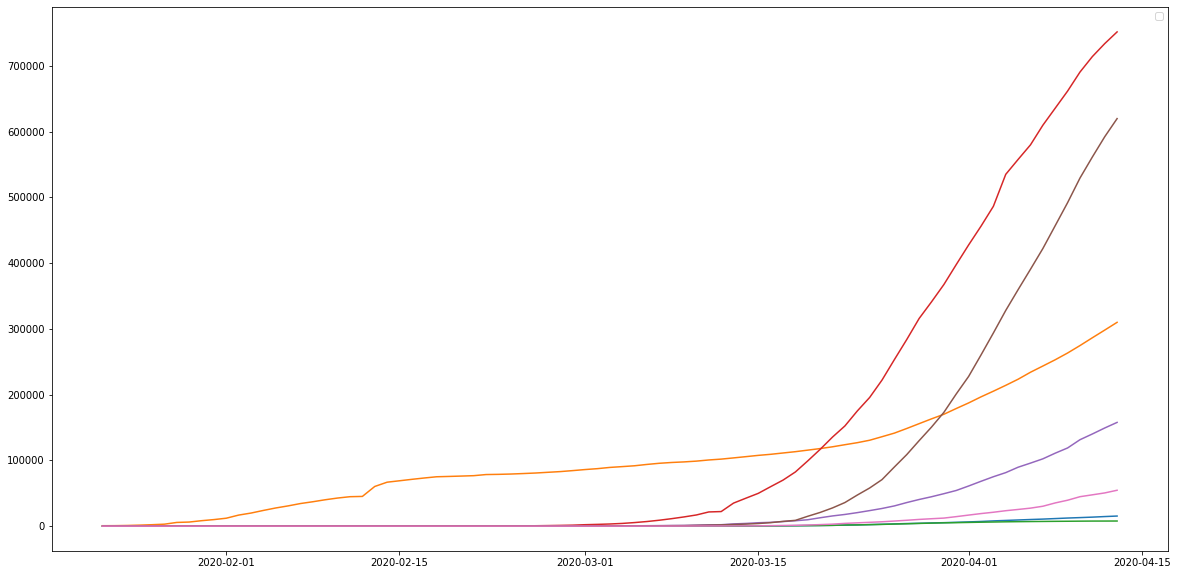

In [9]:
# continent cases - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_cases_graph = cases_data[['continent',] + days_available]
continent_cases_graph = pd.melt(continent_cases_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_cases_graph['day'] = continent_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_cases_graph.reset_index(inplace=True)
continent_cases_graph = pd.pivot_table(continent_cases_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_cases_graph.columns.levels[1]):
    plt.plot(continent_cases_graph.index, continent_cases_graph['cases'][continent])
plt.legend()
print(continent_cases)

No handles with labels found to put in legend.


                       4/6/20  4/13/20 perc_increase perc_of_global
continent                                                          
EU27                    46135    66850        44.90%         55.95%
North America           11419    24962       118.60%         20.89%
Europe                   6538    13193       101.79%         11.04%
Asia                     8933    11330        26.83%          9.48%
South America            1012     2247       122.04%          1.88%
Africa                    487      834        71.25%          0.70%
Australia and Oceania      41       66        60.98%          0.06%


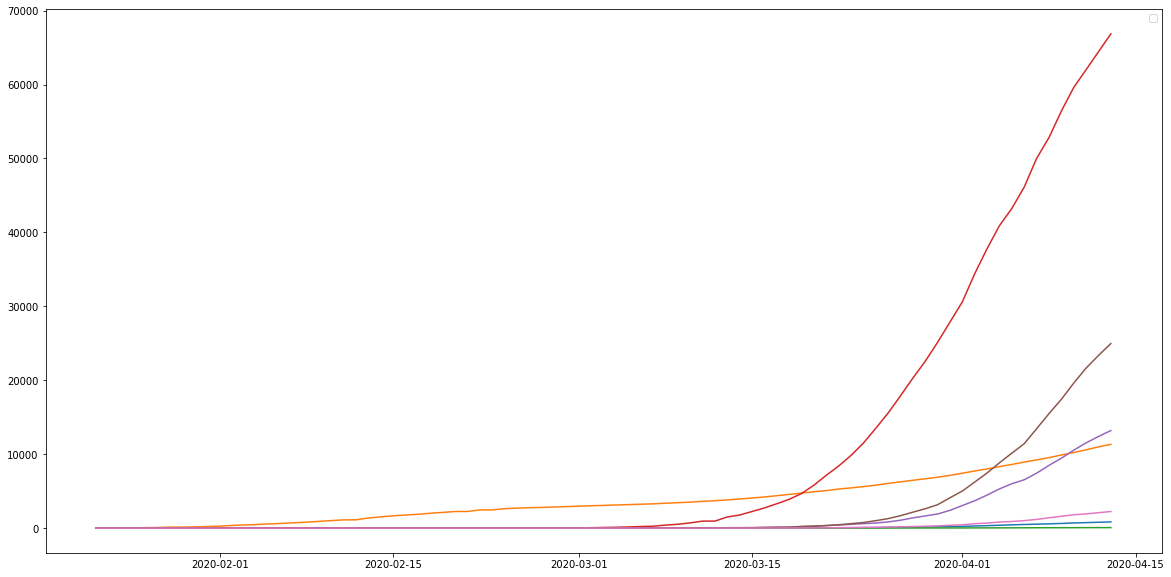

In [10]:
# continent deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_deaths_graph = deaths_data[['continent',] + days_available]
continent_deaths_graph = pd.melt(continent_deaths_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_deaths_graph['day'] = continent_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_deaths_graph.reset_index(inplace=True)
continent_deaths_graph = pd.pivot_table(continent_deaths_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_deaths_graph.columns.levels[1]):
    plt.plot(continent_deaths_graph.index, continent_deaths_graph['cases'][continent])
plt.legend()
print(continent_deaths)

No handles with labels found to put in legend.


                4/6/20  4/13/20 perc_increase perc_of_global
Country/Region                                              
US              366667   580619        58.35%         30.28%
Spain           136675   170099        24.46%          8.87%
Italy           132547   159516        20.35%          8.32%
France           98963   137875        39.32%          7.19%
Germany         103374   130072        25.83%          6.78%
United Kingdom   52279    89570        71.33%          4.67%
China            82665    83213         0.66%          4.34%
Iran             60500    73303        21.16%          3.82%
Turkey           30217    61049       102.04%          3.18%
Belgium          20814    30589        46.96%          1.60%


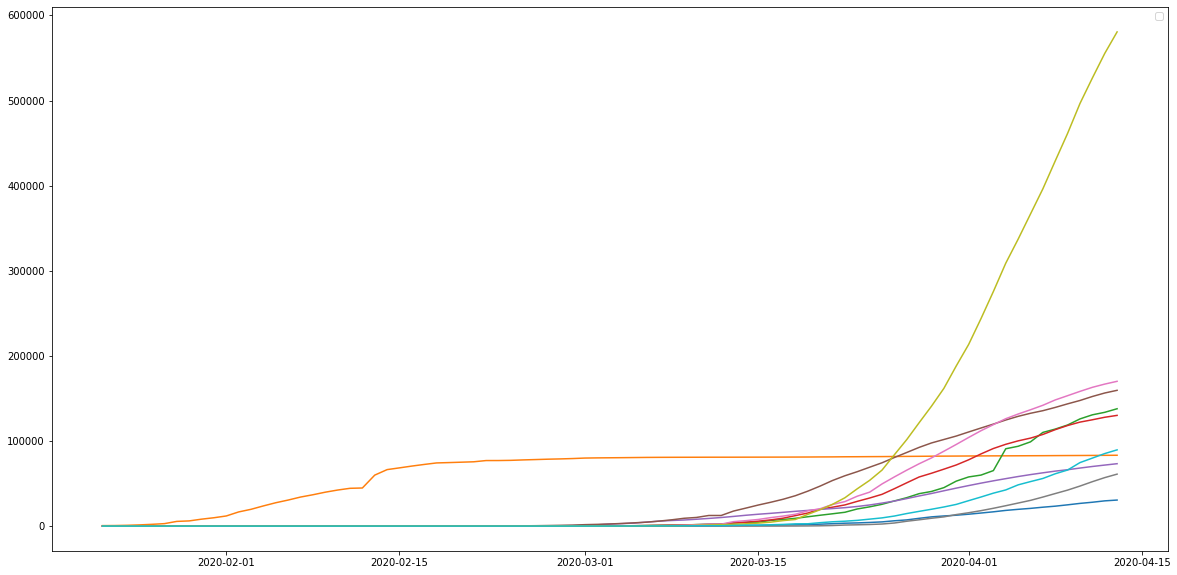

In [11]:
# country cases - graph
plt.rcParams["figure.figsize"] = (20,10)
country_cases_graph = cases_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_cases_graph = pd.melt(country_cases_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_cases_graph['day'] = country_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_cases_graph.reset_index(inplace=True)
country_cases_graph = pd.pivot_table(country_cases_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_cases_graph.columns.levels[1]):
    plt.plot(country_cases_graph.index, country_cases_graph['cases'][country])
plt.legend()
print(countries_cases.head(top_no_countries))

No handles with labels found to put in legend.


                4/6/20  4/13/20 perc_increase perc_of_global
Country/Region                                              
US               10783    23529       118.20%         19.69%
Italy            16523    20465        23.86%         17.13%
Spain            13341    17756        33.09%         14.86%
France            8926    14986        67.89%         12.54%
United Kingdom    5385    11347       110.71%          9.50%
Iran              3739     4585        22.63%          3.84%
Belgium           1632     3903       139.15%          3.27%
China             3335     3345         0.30%          2.80%
Germany           1810     3194        76.46%          2.67%
Netherlands       1874     2833        51.17%          2.37%


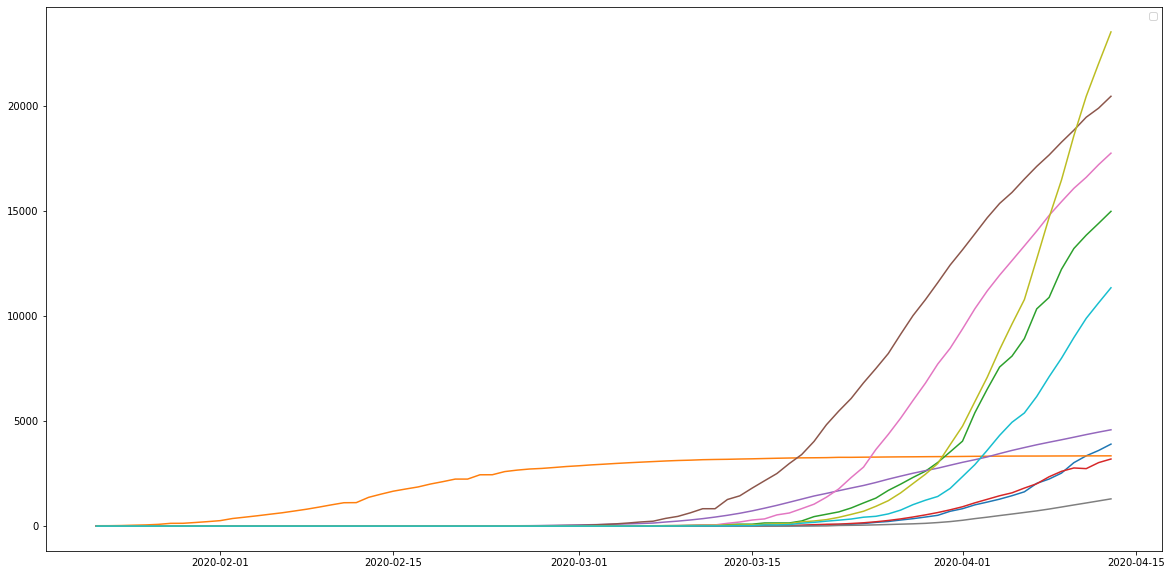

In [12]:
# country deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
country_deaths_graph = deaths_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_deaths_graph = pd.melt(country_deaths_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_deaths_graph['day'] = country_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_deaths_graph.reset_index(inplace=True)
country_deaths_graph = pd.pivot_table(country_deaths_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_deaths_graph.columns.levels[1]):
    plt.plot(country_deaths_graph.index, country_deaths_graph['cases'][country])
plt.legend()
print(countries_deaths.head(top_no_countries))

In [13]:
os.chdir("C:/Users/"+user+"/Documents/git/covid19_daily_charts")
subprocess.check_output(["git", "add", "covid19_daily_charts.ipynb"])
subprocess.check_output(["git", "commit", "-m", "'updating the data'"])
subprocess.check_output(["git", "push"])

CalledProcessError: Command '['git', 'commit', '-m', "'updating the data'"]' returned non-zero exit status 1.